In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv.imread('inputs/img.png')

In [3]:
image = cv.resize(image, (0, 0), fx=0.25, fy=0.25)

In [4]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [5]:
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

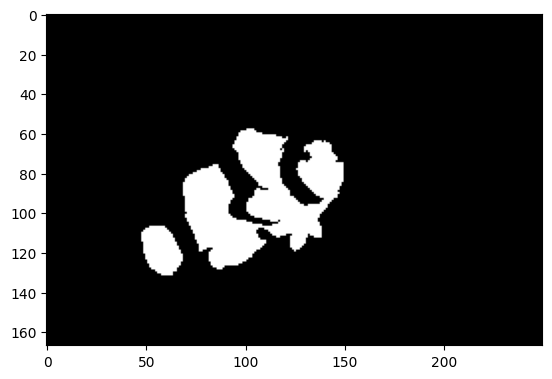

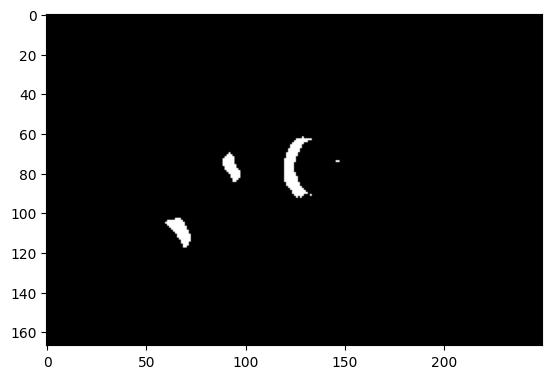

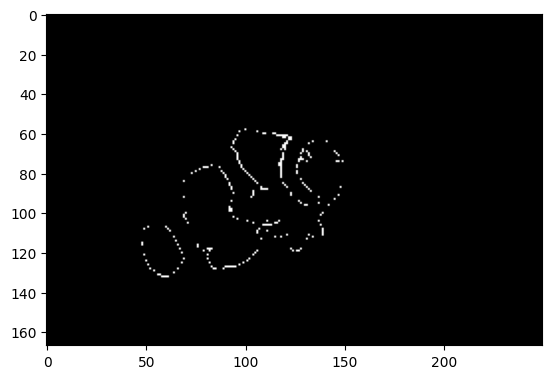

In [6]:
# Get color rage from find_color_range.py
# HSV_RESULT = [0, 100, 140, 255, 0, 255] # orange
# HSV_RESULT = [0, 180, 100, 255, 0, 255] # white
# HSV_RESULT = [170, 180, 0, 255, 0, 255] # black

light_orange = (0, 140, 0)
dark_orange = (100, 255, 255)

light_white = (0, 100, 0)
dark_white = (180, 255, 255)

light_black = (170, 0, 0)
dark_black = (180, 255, 255)

mask_orange = cv.inRange(hsv_image, light_orange, dark_orange)

mask_white = cv.inRange(hsv_image, light_white, dark_white)
mask_white = cv.bitwise_not(mask_white)

mask_black = cv.inRange(hsv_image, light_black, dark_black)

plt.imshow(mask_orange, cmap='gray')
plt.show()
plt.imshow(mask_white, cmap='gray')
plt.show()
plt.imshow(mask_black, cmap='gray')
plt.show()

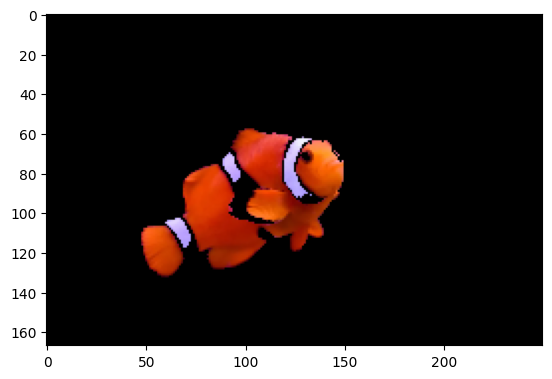

In [7]:
mask = mask_orange + mask_white + mask_black
mask = np.clip(mask, 0, 255).astype(np.uint8)

result = cv.bitwise_and(image, image, mask=mask)
plt.imshow(result)
plt.show()

In [8]:
pixels = hsv_image.reshape(-1, 3)
x_train = pixels / 255
y_train = mask.reshape(-1, 1)
y_train = y_train // 255

In [9]:
from k_nearest_neighbors import KNearestNeighbors

model = KNearestNeighbors(x_train, y_train)

In [10]:
model.predict(np.array([[100, 255, 255]]))

100%|██████████| 1/1 [00:00<00:00, 333.68it/s]


array([1], dtype=int64)

In [11]:
new_image = cv.imread('inputs/img_1.png')
new_image = cv.resize(new_image, (0, 0), fx=0.25, fy=0.25)
new_image_hsv = cv.cvtColor(new_image, cv.COLOR_BGR2HSV)
new_data = new_image_hsv.reshape(-1, 3) / 255
new_data.shape

(13932, 3)

In [12]:
y_predict = model.predict(new_data)

100%|██████████| 13932/13932 [00:42<00:00, 331.60it/s]


In [13]:
y_predict = y_predict.reshape(new_image.shape[:2])

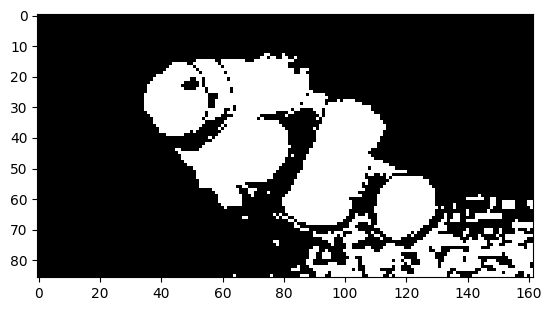

In [14]:
plt.imshow(y_predict, cmap='gray')
plt.show()

In [15]:
y_predict.dtype

dtype('int64')

In [16]:
y_predict = y_predict.astype(np.uint8)

In [17]:
result = cv.bitwise_and(new_image, new_image, mask=y_predict)

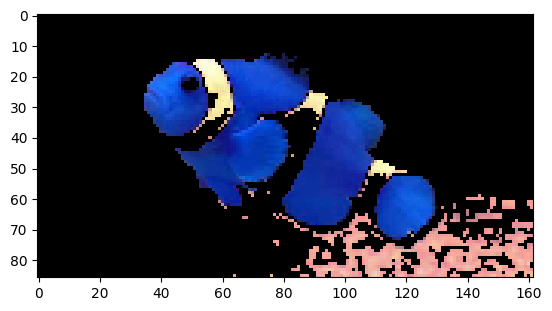

In [18]:
plt.imshow(result)
plt.show()